<Figure size 1200x600 with 0 Axes>

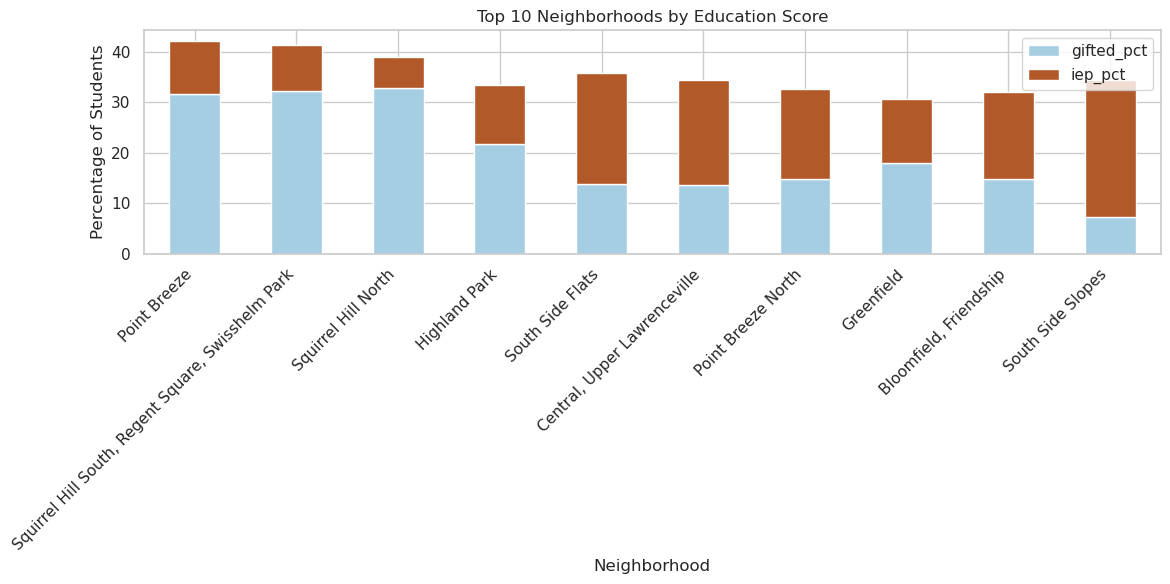

<Figure size 1200x600 with 0 Axes>

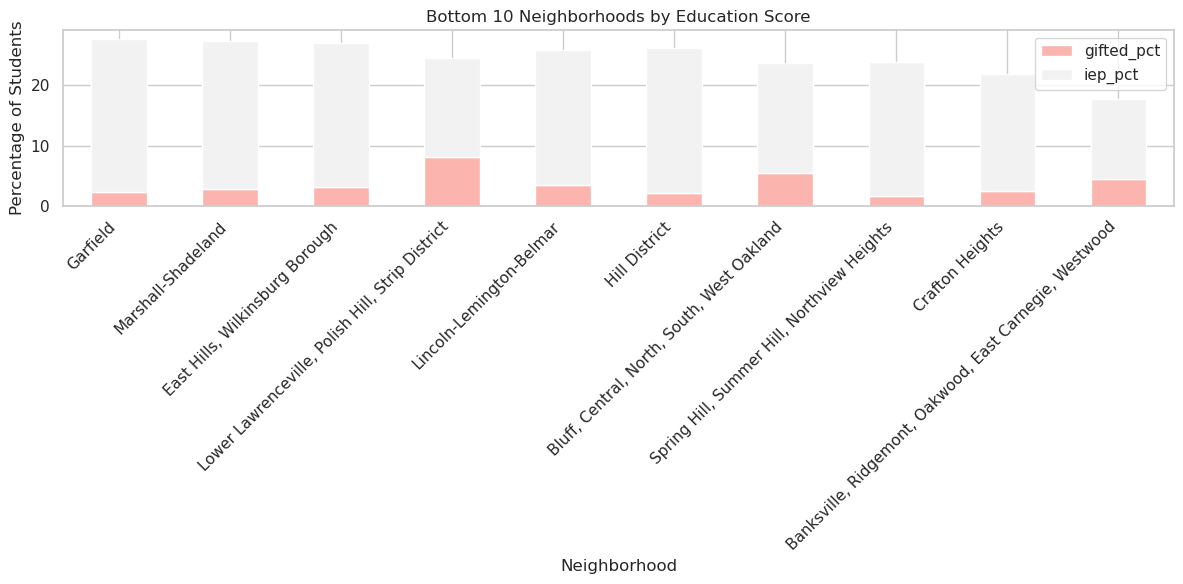

/ihome/crc/install/jupyterhub/hub4.0.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


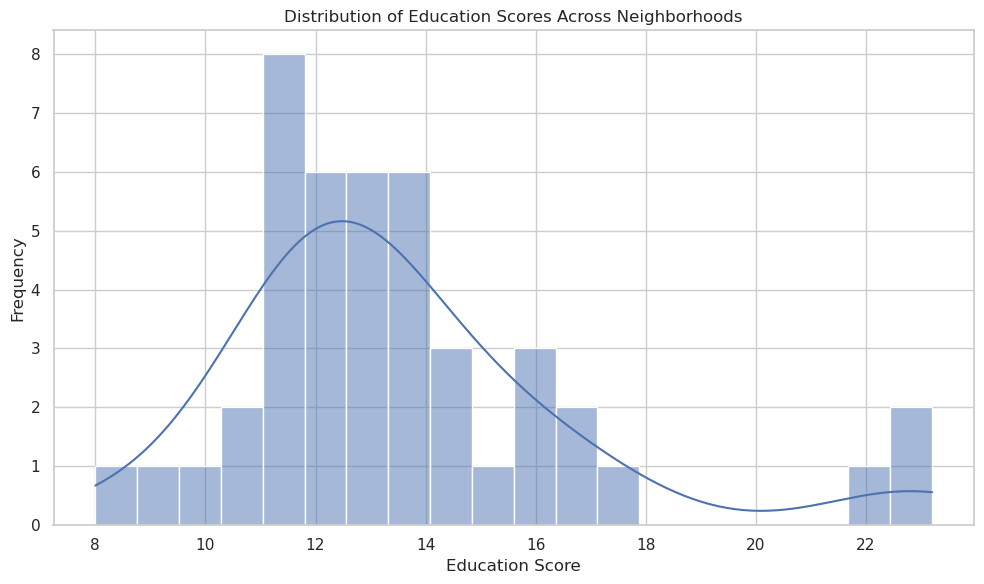

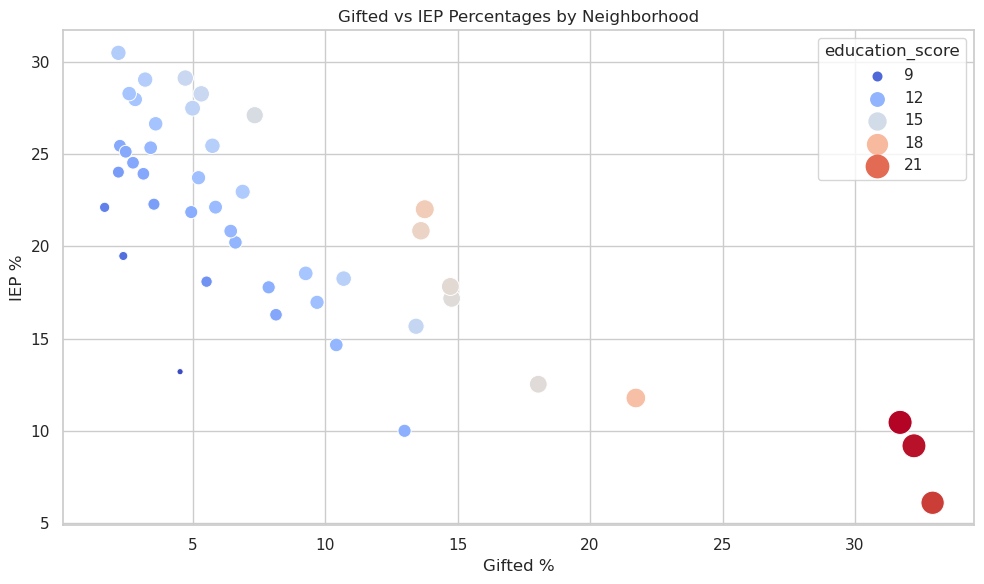

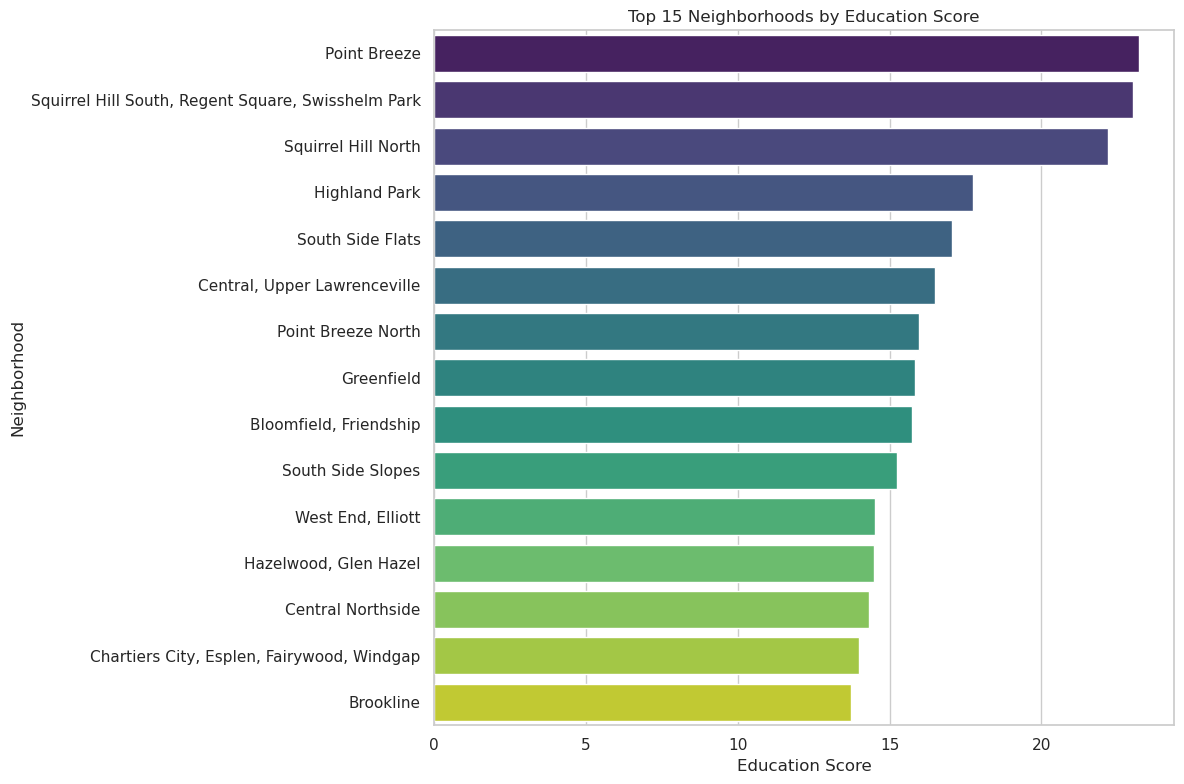

In [11]:
# Public School Education IEP Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IEP data
df = pd.read_csv('neighborhood_iep.csv')


# Calculate percentages
df['gifted_pct'] = (df['gifted'] / df['total_enrollment_k_12']) * 100
df['iep_pct'] = (df['other_iep'] / df['total_enrollment_k_12']) * 100
df['regular_pct'] = (df['not_iep_or_gifted'] / df['total_enrollment_k_12']) * 100

# Create weighted education score
# 60% gifted + 40% IEP (following your example formula)
df['education_score'] = (df['gifted_pct'] * 0.6) + (df['iep_pct'] * 0.4)

# Sort neighborhoods by education score
sorted_df = df.sort_values('education_score', ascending=False)

# Prepare Top 10 and Bottom 10 neighborhoods
top_10 = sorted_df[['neighborhoods', 'gifted_pct', 'iep_pct', 'education_score']].head(10)
bottom_10 = sorted_df[['neighborhoods', 'gifted_pct', 'iep_pct', 'education_score']].tail(10)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot 1: Top 10 stacked bar chart
plt.figure(figsize=(12, 6))
top_10.set_index('neighborhoods')[['gifted_pct', 'iep_pct']].plot(
    kind='bar', stacked=True, colormap='Paired', figsize=(12, 6))
plt.title('Top 10 Neighborhoods by Education Score')
plt.ylabel('Percentage of Students')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Bottom 10 stacked bar chart
plt.figure(figsize=(12, 6))
bottom_10.set_index('neighborhoods')[['gifted_pct', 'iep_pct']].plot(
    kind='bar', stacked=True, colormap='Pastel1', figsize=(12, 6))
plt.title('Bottom 10 Neighborhoods by Education Score')
plt.ylabel('Percentage of Students')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Histogram of education scores
plt.figure(figsize=(10, 6))
sns.histplot(df['education_score'], kde=True, bins=20)
plt.title('Distribution of Education Scores Across Neighborhoods')
plt.xlabel('Education Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 4: Scatter plot of Gifted vs IEP Percentages
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gifted_pct', y='iep_pct', size='education_score',
                hue='education_score', palette='coolwarm', sizes=(20, 300))
plt.title('Gifted vs IEP Percentages by Neighborhood')
plt.xlabel('Gifted %')
plt.ylabel('IEP %')
plt.tight_layout()
plt.show()

# Plot 5: Top 15 Neighborhoods by education score (bar chart)
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_df.head(15), x='education_score', y='neighborhoods', palette='viridis')
plt.title('Top 15 Neighborhoods by Education Score')
plt.xlabel('Education Score')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()
